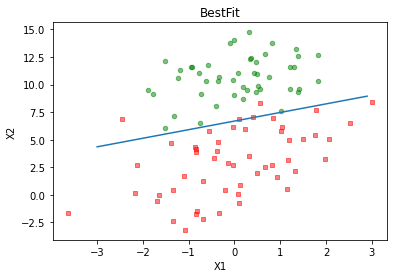

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet():
    dataMat = []                                                         #创建数据列表
    labelMat = []                                                        #创建标签列表
    fr = open('dataSet_01.txt')                                          #打开文件   
    for line in fr.readlines():                                          #逐行读取
        lineArr = line.strip().split()                                   #去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(int(lineArr[2]))                                 #添加标签
    fr.close()                                                           #关闭文件
    return dataMat, labelMat                                             #返回

def plotDataSet():
    dataMat, labelMat = loadDataSet()                                    #加载数据集
    dataArr = np.array(dataMat)                                          #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                             #数据个数
    xcord1 = []; ycord1 = []                                             #正样本
    xcord2 = []; ycord2 = []                                             #负样本
    for i in range(n):                                                   #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])     #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])     #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=.5)      #绘制正样本
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=.5)                #绘制负样本
    plt.title('DataSet')                                                 #绘制title
    plt.xlabel('x'); plt.ylabel('y')                                     #绘制label
    plt.show()   

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        error = labelMat - sigmoid(dataMatrix * weights)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()

def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()                                       #加载数据集
    dataArr = np.array(dataMat)                                             #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                                #数据个数
    xcord1 = []; ycord1 = []                                                #正样本
    xcord2 = []; ycord2 = []                                                #负样本
    for i in range(n):                                                      #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])        #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])        #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                               #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)    #绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)                #绘制负样本
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.title('BestFit')                                                    #绘制title
    plt.xlabel('X1'); plt.ylabel('X2')                                      #绘制label
    plt.show()       

if __name__ == '__main__':
    dataMat, labelMat = loadDataSet()           
    weights = gradAscent(dataMat, labelMat)
    plotBestFit(weights)

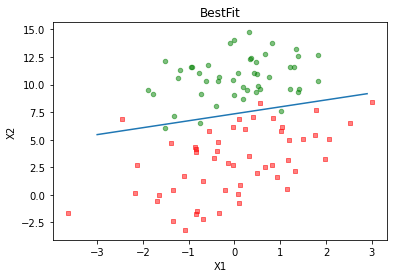

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import random

def loadDataSet():
    dataMat = []                                                         #创建数据列表
    labelMat = []                                                        #创建标签列表
    fr = open('dataSet_01.txt')                                          #打开文件   
    for line in fr.readlines():                                          #逐行读取
        lineArr = line.strip().split()                                   #去回车，放入列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(int(lineArr[2]))                                 #添加标签
    fr.close()                                                           #关闭文件
    return dataMat, labelMat                                             #返回

def plotDataSet():
    dataMat, labelMat = loadDataSet()                                    #加载数据集
    dataArr = np.array(dataMat)                                          #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                             #数据个数
    xcord1 = []; ycord1 = []                                             #正样本
    xcord2 = []; ycord2 = []                                             #负样本
    for i in range(n):                                                   #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])     #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])     #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord1, ycord1, s=20, c='red', marker='s', alpha=.5)      #绘制正样本
    ax.scatter(xcord2, ycord2, s=20, c='green', alpha=.5)                #绘制负样本
    plt.title('DataSet')                                                 #绘制title
    plt.xlabel('x'); plt.ylabel('y')                                     #绘制label
    plt.show()   

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        error = labelMat - sigmoid(dataMatrix * weights)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights.getA()

def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)                                                     #返回dataMatrix的大小。m为行数,n为列数。
    weights = np.ones(n)                                                            #参数初始化
    for j in range(numIter):                                           
        dataIndex = list(range(m))
        for i in range(m):           
            alpha = 4/(1.0+j+i)+0.01                                                #降低alpha的大小，每次减小1/(j+i)。
            randIndex = int(random.uniform(0, len(dataIndex)))                      #随机选取样本
            h = sigmoid(sum(dataMatrix[dataIndex[randIndex]]*weights))
            error = classLabels[dataIndex[randIndex]] - h
            weights = weights + alpha * error * np.array(dataMatrix[dataIndex[randIndex]])
            del(dataIndex[randIndex])
    return weights

def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()                                       #加载数据集
    dataArr = np.array(dataMat)                                             #转换成numpy的array数组
    n = np.shape(dataMat)[0]                                                #数据个数
    xcord1 = []; ycord1 = []                                                #正样本
    xcord2 = []; ycord2 = []                                                #负样本
    for i in range(n):                                                      #根据数据集标签进行分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])        #1为正样本
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])        #0为负样本
    fig = plt.figure()
    ax = fig.add_subplot(111)                                               #添加subplot
    ax.scatter(xcord1, ycord1, s = 20, c = 'red', marker = 's',alpha=.5)    #绘制正样本
    ax.scatter(xcord2, ycord2, s = 20, c = 'green',alpha=.5)                #绘制负样本
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.title('BestFit')                                                    #绘制title
    plt.xlabel('X1'); plt.ylabel('X2')                                      #绘制label
    plt.show()

if __name__ == '__main__':
    dataMat, labelMat = loadDataSet()
    weights = stocGradAscent1(dataMat, labelMat)
    plotBestFit(weights)